# Notebook to show basic gradient descent set up in Julia

In [1]:
using LinearAlgebra
using DelimitedFiles
using Plots
using Statistics

wd = pwd()
if ~occursin(wd).("Basic_Gradient_Descent_Julia")
    cd("$(wd)/Basic_Gradient_Descent_Julia")
end

include("costfunc.jl")

costfunc (generic function with 1 method)

## define gradient descent and cost function

In [2]:
function costfunc(X,y,theta) #last expression will be returned if no return statement
    m = size(y,1)
    J = 1/(2*m) * sum((X*theta-y).^2)

end

function gradDesc(X,y,theta, lr, epochs)
    m=size(y,1)
    J_history = zeros(epochs, 1)
    for iter = 1:epochs

        gradJ = 1/m * X'*(X*theta - y)
        theta = theta - lr * gradJ
        Jloop = costfunc(X,y,theta)
        J_history[iter] = Jloop

    end
    return theta, J_history
end

gradDesc (generic function with 1 method)

## set up data to be fitted

In [3]:

weight = .5;
bias = 0.7;
noise = 0.15;
epochs = 1500;
lr = 0.003;

normalise=false

x = Array{Float32}(1:0.05:10);
x_Before = copy(x);
f(x,weight,bias) = weight*x .+ bias ;
y = f(x,weight,bias) + randn(size(x,1)).*noise;

## Normalise features

In [4]:

if normalise
    x_Recovered = rand(Array{Float32}(minimum(x):0.1:maximum(x)),size(x,1))
    for col=1:size(x,2)
        println("col ",col)
        mean_x = mean(x[:,col],dims=1);
        std_x = std(x[:,col]);
        x[:,col] =  (x[:,col] .- mean_x)/std_x;
        x_Recovered[:,col] = (x[:,col].*std_x).+mean_x;
    end
    difference = x_Before .- x_Recovered;
    println("Diff is ",sum(difference))
end

## add bias column to X matrix 

In [5]:
X = [ones(size(x,1)) x];

## run gradient descent

In [6]:
theta = rand(0:0.01:1, 2, 1);
opt_theta, costHist = gradDesc(X,y,theta,lr,epochs);

## compute fitted line and plot cost and fit

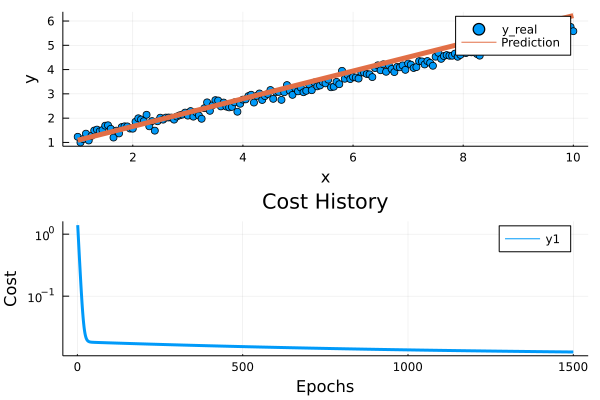

In [7]:
y_predict = f(x_Before, opt_theta[1], opt_theta[2]);

p1=plot(x,y,ylabel="y", xlabel = "x", seriestype=:scatter,label="y_real")
plot!(x,y_predict,lw=5, seriestype=:line,label="Prediction")
p2=plot(
    1:epochs,costHist,
    ylabel="Cost", xlabel = "Epochs", 
    lw = 3, title = "Cost History", yaxis=:log)
plot(p1,p2,layout=(2,1))